In [1]:
%matplotlib inline
%run ../../path_import.py
import numpy as np
import matplotlib.pyplot as plt
from plots import *
from utils import *
from training import *
from model_mu import *
import time
import probtorch
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
Data = torch.from_numpy(np.load('../rings_fixed_radius/obs.npy')).float()
## Data Parameters
N = 300
K = 3
D = 2
FIXED_RADIUS = 1.5
## Model Parameters
MCMC_SIZE = 10
SAMPLE_SIZE = 10
NUM_HIDDEN_GLOBAL = 8
NUM_HIDDEN_LOCAL = 64
STAT_SIZE = 8
NUM_LATENTS =  D
## Training Parameters
BATCH_SIZE = 20
NUM_EPOCHS = 100
LEARNING_RATE = 1e-3
CUDA = torch.cuda.is_available()
PATH = 'ag-mu-idw-v1'
DEVICE = torch.device('cuda:1')

In [3]:
enc_mu, enc_z, optimizer = initialize(NUM_HIDDEN_GLOBAL, STAT_SIZE, NUM_HIDDEN_LOCAL, K, D, CUDA, DEVICE, LEARNING_RATE)

In [4]:
# enc_mu.load_state_dict(torch.load("../weights/enc-mu-%s" % PATH))
# enc_z.load_state_dict(torch.load("../weights/enc-z-%s" % PATH))

In [7]:
train(Eubo_mu, enc_mu, enc_z, optimizer, Data, FIXED_RADIUS, K, NUM_EPOCHS, MCMC_SIZE, SAMPLE_SIZE, BATCH_SIZE, PATH, CUDA, DEVICE)

epoch=0, EUBO=-619.065, ELBO=-935.145, ESS=5.410 (29s)
epoch=1, EUBO=-691.370, ELBO=-993.379, ESS=5.433 (30s)
epoch=2, EUBO=-653.820, ELBO=-937.451, ESS=5.429 (29s)
epoch=3, EUBO=-772.096, ELBO=-1039.629, ESS=5.431 (29s)
epoch=4, EUBO=-594.677, ELBO=-865.012, ESS=5.451 (29s)
epoch=5, EUBO=-587.759, ELBO=-834.512, ESS=5.454 (29s)
epoch=6, EUBO=-678.223, ELBO=-920.045, ESS=5.471 (29s)
epoch=7, EUBO=-721.426, ELBO=-956.058, ESS=5.469 (29s)
epoch=8, EUBO=-623.582, ELBO=-845.829, ESS=5.465 (29s)
epoch=9, EUBO=-658.568, ELBO=-876.695, ESS=5.486 (30s)
epoch=10, EUBO=-583.138, ELBO=-789.794, ESS=5.494 (29s)
epoch=11, EUBO=-525.620, ELBO=-734.868, ESS=5.494 (29s)


KeyboardInterrupt: 

In [6]:
torch.save(enc_mu.state_dict(), "../weights/enc-mu-%s" % PATH)
torch.save(enc_z.state_dict(), "../weights/enc-z-%s" % PATH)

CPU times: user 4.95 s, sys: 15.7 ms, total: 4.97 s
Wall time: 4.96 s


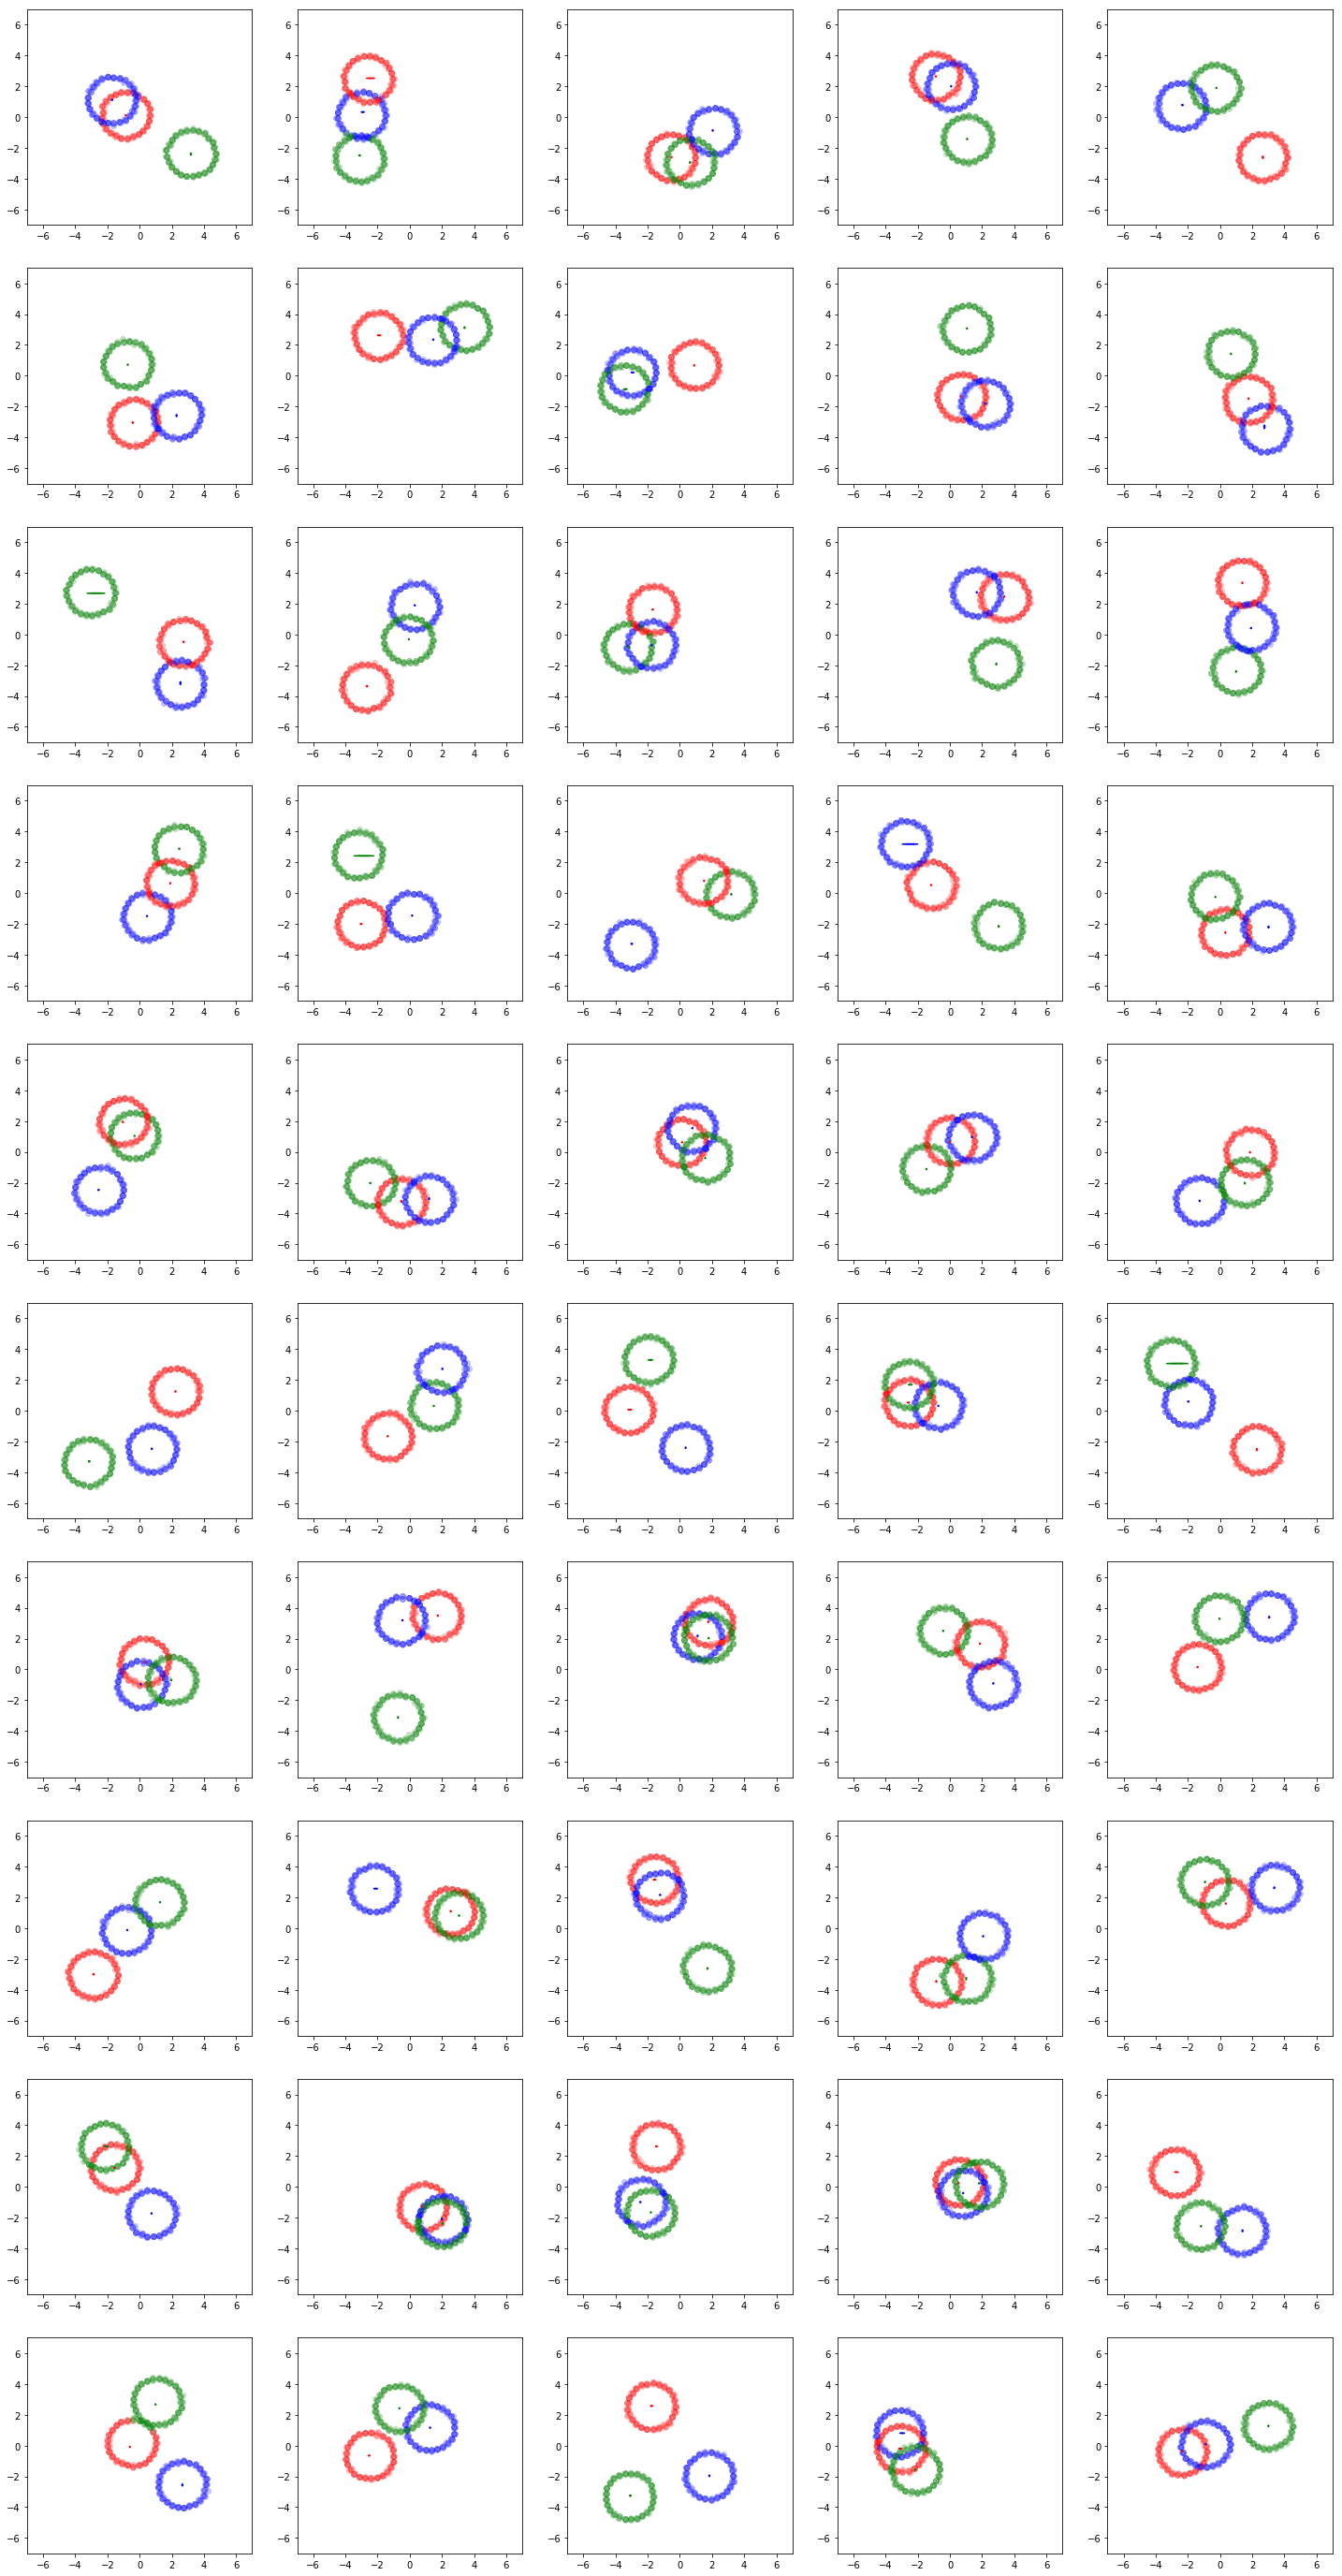

In [8]:
BATCH_SIZE_TEST = 50
obs, q_mu, q_z = test(Eubo_mu, enc_mu, enc_z, Data, FIXED_RADIUS, K, MCMC_SIZE, SAMPLE_SIZE, BATCH_SIZE_TEST, CUDA, DEVICE)
%time plot_samples(obs, q_mu, q_z, K, PATH)